In [1]:
# %load C:\Users\walter\Desktop\tools\plot_template.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='serif')
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14, color='grey')
plt.rc('ytick', labelsize=14, color='grey')
plt.rc('legend', fontsize=16, loc='lower left')
plt.rc('savefig', dpi=330, bbox='tight')
%matplotlib inline

In [37]:
benchmark_npz = 'Standard_3C_SF_TMY3_1.npz'
data = np.load(benchmark_npz)
data = data['arr_0']

benchmark_randomSP = pd.DataFrame(data=data[:,[0,-19]],
                                  index=pd.date_range(start='1/1/2018', periods=len(data), freq='15T'))
benchmark_randomSP.columns = ['Outdoor temp_random sp','Guideline 36_random sp']
benchmark_randomSP = benchmark_randomSP.resample('H').mean()

In [22]:
benchmark_file = 'in.csv'

benchmark_contantSP = pd.read_csv(benchmark_file,usecols=['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                                       'NODE 149:System Node Temperature [C](TimeStep)'])
benchmark_contantSP.index = pd.date_range(start='1/1/2018', periods=len(benchmark_contantSP), freq='1H')
benchmark_contantSP.columns = ['Outdoor temp_constant sp','Guideline 36_constant sp']

In [38]:
benchmark = pd.concat([benchmark_randomSP,benchmark_contantSP],axis=1)

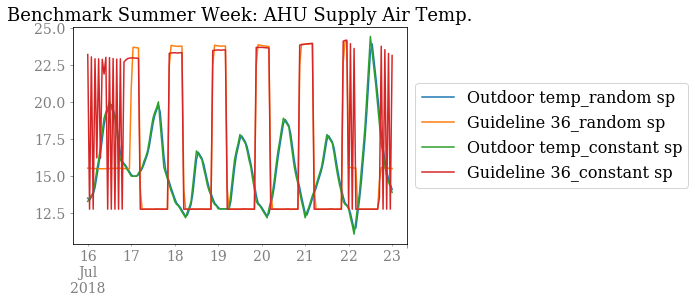

In [39]:
benchmark_summer = benchmark.truncate(before='2018-07-16',after='2018-07-23')

benchmark_summer.plot()
plt.title('Benchmark Summer Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

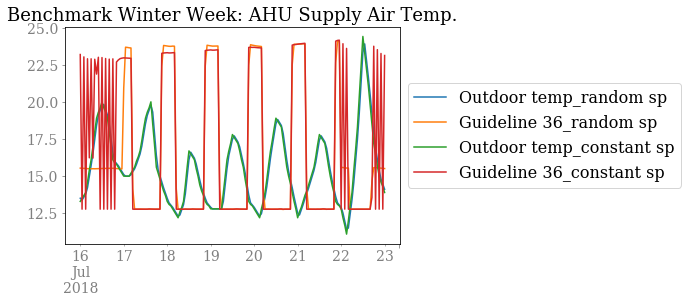

In [40]:
benchmark_winter = benchmark.truncate(before='2018-02-16',after='2018-02-23')

benchmark_summer.plot()
plt.title('Benchmark Winter Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
file_name = 'moreILTraining'

il_file = file_name+'il.csv'
il_columns = ['0','4','8']

il = pd.read_csv(il_file, index_col=0)
il = il[il_columns]
il.index = pd.date_range(start='1/1/2018', periods=len(il),freq='15T')
il = il.resample('H').mean()
il.columns = [f'IL epoch {i}' for i in il_columns]

In [31]:
rl_file = file_name+'_ddpg.csv'
ddpg_columns = ['2','6','10','14']

rl = pd.read_csv(rl_file, index_col=0)
rl = rl[ddpg_columns]
rl.index = pd.date_range(start='1/1/2018', periods=len(rl),freq='15T')
rl = rl.resample('H').mean()
rl.columns = [f'RL epoch {i}' for i in ddpg_columns]

In [32]:
data = pd.concat([benchmark,il,rl],axis=1)
data.head()

,Outdoor temp,Guideline 36,IL epoch 0,IL epoch 4,IL epoch 8,IL epoch 18,RL epoch 2,RL epoch 6,RL epoch 14
2018-01-01 00:00:00,7.2,21.018699,25.105204,13.922860,12.473449,12.052442,18.607856,14.269027,13.633914
2018-01-01 01:00:00,7.2,21.029343,25.205299,14.187376,12.744027,12.220682,18.601324,14.320586,13.752067
2018-01-01 02:00:00,6.7,20.986476,25.213578,14.174654,12.624945,11.893677,18.610014,14.329219,13.774894
2018-01-01 03:00:00,6.1,20.989025,25.213768,13.916120,12.372485,11.576457,18.635399,14.346742,13.784294
2018-01-01 04:00:00,4.4,20.961929,25.197622,13.288472,11.720253,10.845647,18.697213,14.379119,13.793478


In [33]:
data.mean()

Outdoor temp    13.793756
Guideline 36    16.783839
IL epoch 0      25.696802
IL epoch 4      10.341283
IL epoch 8       8.985202
IL epoch 18      9.248214
RL epoch 2      18.462681
RL epoch 6      14.269918
RL epoch 14     13.532526
dtype: float64

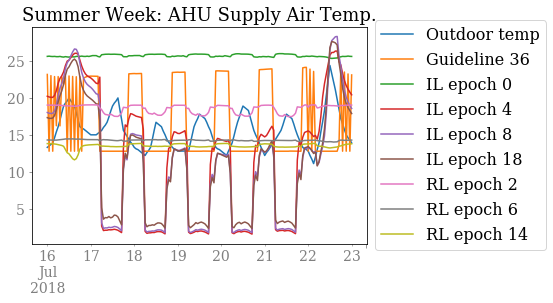

In [34]:
summer = data.truncate(before='2018-07-16',after='2018-07-23')

summer.plot()
plt.title('Summer Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

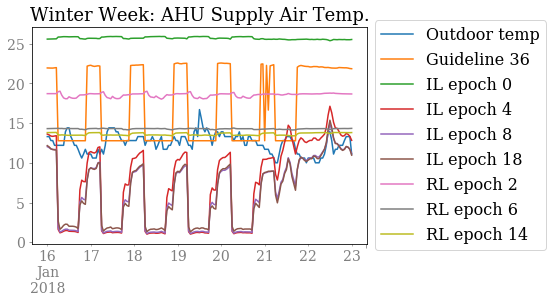

In [35]:
winter = data.truncate(before='2018-01-16',after='2018-01-23')

winter.plot()
plt.title('Winter Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [51]:
list(range(7,15))

[7, 8, 9, 10, 11, 12, 13, 14]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

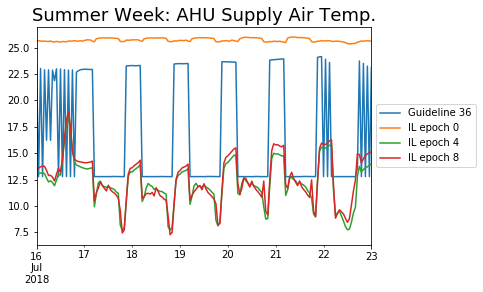

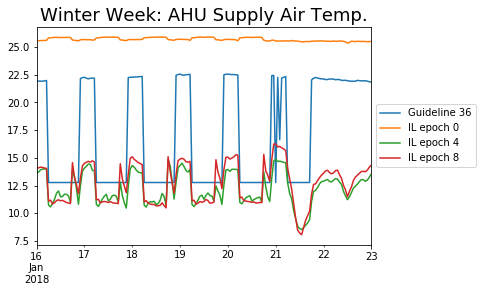

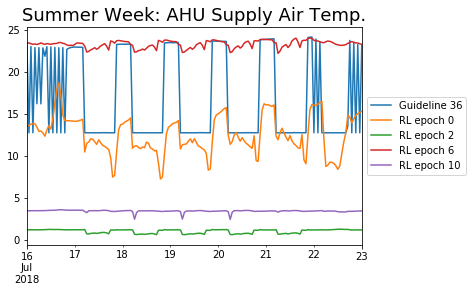

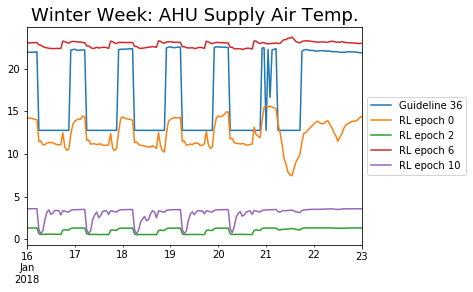

In [11]:
file_name = 'debugUnpackIL'

# read in the benchmark data
benchmark = 'in.csv'

benchmark = pd.read_csv(benchmark,usecols=['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                                       'NODE 149:System Node Temperature [C](TimeStep)'])
benchmark.index = pd.date_range(start='1/1/2018', periods=len(benchmark), freq='1H')
benchmark.columns = ['Outdoor temp','Guideline 36']

# read in il data
il_file = file_name+'il.csv'
il_columns = ['0','4','8']
il = pd.read_csv(il_file, index_col=0)
il = il[il_columns]
il.index = pd.date_range(start='1/1/2018', periods=len(il),freq='15T')
il = il.resample('H').mean()
il.columns = ['IL epoch {0}'.format(i) for i in il_columns]

# add benchmark
il = pd.concat([benchmark['Guideline 36'],il],axis=1)

# plot
il_summer = il.truncate(before='2018-07-16',after='2018-07-23')
il_summer.plot()
plt.title('Summer Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

il_winter = il.truncate(before='2018-01-16',after='2018-01-23')
il_winter.plot()
plt.title('Winter Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# read in rl data
rl_file = file_name+'_ddpg.csv'
ddpg_columns = ['0','2','6','10']
rl = pd.read_csv(rl_file, index_col=0)
rl = rl[ddpg_columns]
rl.index = pd.date_range(start='1/1/2018', periods=len(rl),freq='15T')
rl = rl.resample('H').mean()
rl.columns = ['RL epoch {0}'.format(i) for i in ddpg_columns]

# merge data
# data = pd.concat([benchmark,il,rl],axis=1)
# data.head()

# add benchmark
rl = pd.concat([benchmark['Guideline 36'],rl],axis=1)

# plot
rl_summer = rl.truncate(before='2018-07-16',after='2018-07-23')
rl_summer.plot()
plt.title('Summer Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

rl_winter = rl.truncate(before='2018-01-16',after='2018-01-23')
rl_winter.plot()
plt.title('Winter Week: AHU Supply Air Temp.', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))